# Importación de librerías

In [26]:
# Importación de librerías
import numpy as np
import matplotlib.pyplot as plt
from style import mpl_apply
import time
import math

# Configuración del estilo
mpl_apply()

# Generador de números aleatorios
rng = np.random.default_rng()


# Ejercicio 1

Queremos simular una variable aleatoria X con distribución discreta:

$$
P(X = k) = p_k,\quad k\in\{1,2,3,4\}.
$$

donde
$$
p_1=\tfrac{1}{2},\quad p_2=\tfrac{1}{4},\quad p_3=\tfrac{1}{8},\quad p_4=\tfrac{1}{8}.
$$

## a) Distribución de referencia q(k)

Proponga una distribución de referencia $q(k)$ sobre $\{1, 2, 3, 4\}$
que sea fácil de simular.

Se elige $q(k)=\tfrac14$, uniforme en $\{1,2,3,4\}$

## b) Cota con constante c

Determine la constante $c$ tal que

$$
p_k \le c\, q(k),\ \forall k.
$$

Se necesita $p_k\le c\,q(k)\ \forall k$, es decir $c\ge \max_k \frac{p_k}{q(k)}$.


$$

\frac{p_1}{q(1)}=\frac{1/2}{1/4}=2,\quad

\frac{p_2}{q(2)}=\frac{1/4}{1/4}=1,\quad

\frac{p_3}{q(3)}=\frac{1/8}{1/4}=0.5,\quad

\frac{p_4}{q(4)}=\frac{1/8}{1/4}=0.5.

$$

  

$$

\Rightarrow\ \boxed{c=\max\{2,1,0.5,0.5\}=2.}

$$

  

**Regla de aceptación**

  

Se genera $Y\sim q$ y $U\sim \mathrm{Unif}(0,1)$. Se acepta $X=Y$ si

  

$$

U\le \frac{p_Y}{c\,q(Y)}=\frac{p_Y}{2\cdot(1/4)}=2\,p_Y.

$$


  

* Si $Y=1$: acepta si $U\le 1$ (siempre).

* Si $Y=2$: acepta si $U\le 1/2$.

* Si $Y=3$ o $4$: acepta si $U\le 1/4$.

  

**Eficiencia**
  

La probabilidad de aceptar en una propuesta es

  

$$

\sum_{k} q(k)\,\min\!\Big(1,\frac{p_k}{c\,q(k)}\Big)

=\sum_k q(k)\,\frac{p_k}{c\,q(k)}=\frac{1}{c}\sum_k p_k=\frac{1}{c}.

$$

  

Aquí $1/c=1/2$. El número esperado de intentos por muestra aceptada es $c=2$.

  


## c) Algoritmo de aceptación–rechazo

Describa el algoritmo de aceptación–rechazo para generar una
realización de $X$.


```

1. `repeat:`

2.  Genera $Y\in\{1,2,3,4\}$ con prob. $1/4$ c/u.

3.  Genera $U\sim U(0,1)$.

4.  Si $U\le p_Y/(2\cdot 1/4)=2p_Y$, **acepta** y devuelve $X=Y$; si no, regresa a 1.

```

  

## d) Programa de simulación y estimación de c

Elabore un programa de cómputo que simule la distribución anterior y compare el valor teórico de $c$ con un valor aproximado obtenido de las simulaciones.

Aceptación empírica ≈ 0.501  (teórica 0.500)
Intentos por muestra ≈ 1.997  (teórica 2.000)
Frecuencias simuladas: {1: np.float64(0.50032), 2: np.float64(0.25014), 3: np.float64(0.125445), 4: np.float64(0.124095)}
Probabilidades teóricas: {1: 0.5, 2: 0.25, 3: 0.125, 4: 0.125}


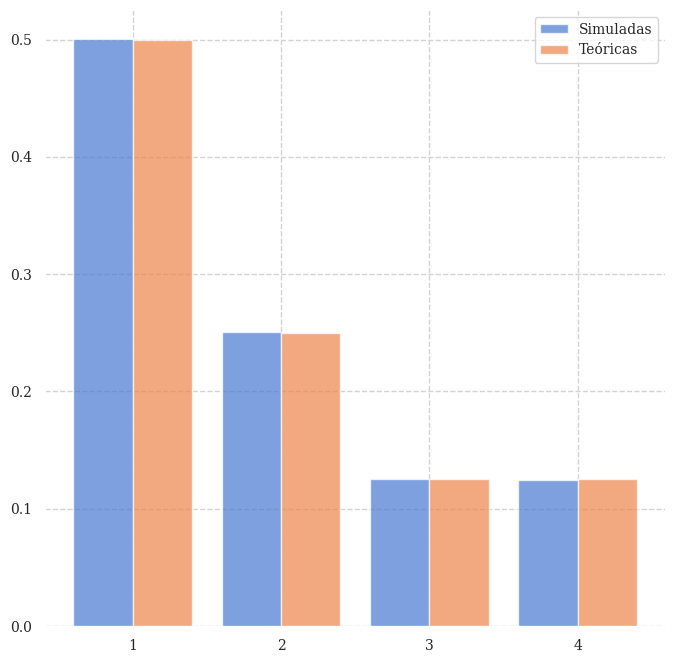

In [23]:
p = {1: 1/2, 2: 1/4, 3: 1/8, 4: 1/8}
q = {1: 1/4, 2: 1/4, 3: 1/4, 4: 1/4}
c = 2.0

def ar_discreto(n=100000):
    X, trials, acc = [], 0, 0
    while len(X) < n:
        y = rng.integers(1,5)         # propuesta uniforme
        u = rng.random()
        trials += 1
        if u <= p[y] / (c*q[y]):      # umbral = 2*p[y]
            X.append(y); acc += 1
    return np.array(X), acc/trials, trials/n

x, acc, intents = ar_discreto(200000)
print(f"Aceptación empírica ≈ {acc:.3f}  (teórica 0.500)")
print(f"Intentos por muestra ≈ {intents:.3f}  (teórica 2.000)")

vals, counts = np.unique(x, return_counts=True)
freq = {int(k): v/len(x) for k, v in zip(vals, counts)}
print("Frecuencias simuladas:", freq)
print("Probabilidades teóricas:", p)

bar_width = 0.4
keys = np.array(list(freq.keys()))
simulated_values = np.array(list(freq.values()))
theoretical_values = np.array([p[k] for k in keys])

plt.bar(keys - bar_width/2, simulated_values, width=bar_width, alpha=0.7, label="Simuladas")
plt.bar(keys + bar_width/2, theoretical_values, width=bar_width, alpha=0.7, label="Teóricas")
plt.xticks(keys)
plt.legend()
plt.show()

# Ejercicio 2

## Simulación $\text{Beta}(1, 2.3)$ por aceptación–rechazo

Utilice el método de aceptación y rechazo para simular una variable
aleatoria con distribución $\text{Beta}(1, 2.3)$. Elabore un programa de cómputo
que genere simulaciones de esta variable y compare resultados con
la densidad teórica.

## 1) Planteamiento

Interpretamos “Beta(1, 2,3)” como **Beta(1, β)** con posible **escala** $s$:

* Caso A: $β=2.3$ en $(0,1)$ (coma decimal).
* Caso B: $β=2$ en $(0,3)$ (escala $s=3$).
  El método es idéntico para cualquier $β>0$ y $s>0$.

## 2) Densidad objetivo (con escala)

Si $Y\sim \text{Beta}(1,β)$ en $(0,1)$, $f_Y(y)=β(1-y)^{β-1}$, $0<y<1$.
Con $X=sY$ ($0<X<s$):

$$
f_X(x)=\frac{1}{s}\,f_Y(x/s)=\frac{β}{s}\Bigl(1-\frac{x}{s}\Bigr)^{β-1},\quad 0<x<s.
$$

## 3) Propuesta $g$

Toma $g(x)=\text{Unif}(0,s)\Rightarrow g(x)=\tfrac{1}{s}$.

## 4) Constante $c$ (cálculo “a mano”)

$$
\frac{f(x)}{g(x)}=β\Bigl(1-\frac{x}{s}\Bigr)^{β-1}\le β
\quad\Longrightarrow\quad
\boxed{c=\max_{x\in(0,s)}\frac{f(x)}{g(x)}=β.}
$$

## 5) Regla de aceptación

Genera $Y\sim \text{Unif}(0,s)$, $U\sim U(0,1)$. Acepta $X=Y$ si

$$
\boxed{U \le \Bigl(1-\frac{Y}{s}\Bigr)^{β-1}.}
$$

## 6) Eficiencia

Prob. de aceptación $=1/c=\boxed{1/β}$.
Intentos esperados por muestra $=c=\boxed{β}$.

## 7) Pseudocódigo

1. Repite:
2.   $Y\leftarrow \text{Unif}(0,s)$, $U\leftarrow U(0,1)$.
3.   Si $U \le (1-Y/s)^{β-1}$, acepta $X=Y$; si no, regresa a 2.

Beta(1,2.3) en (0,1): aceptación empírica ≈ 0.434, teórica = 0.435, intentos/muestra ≈ 2.30


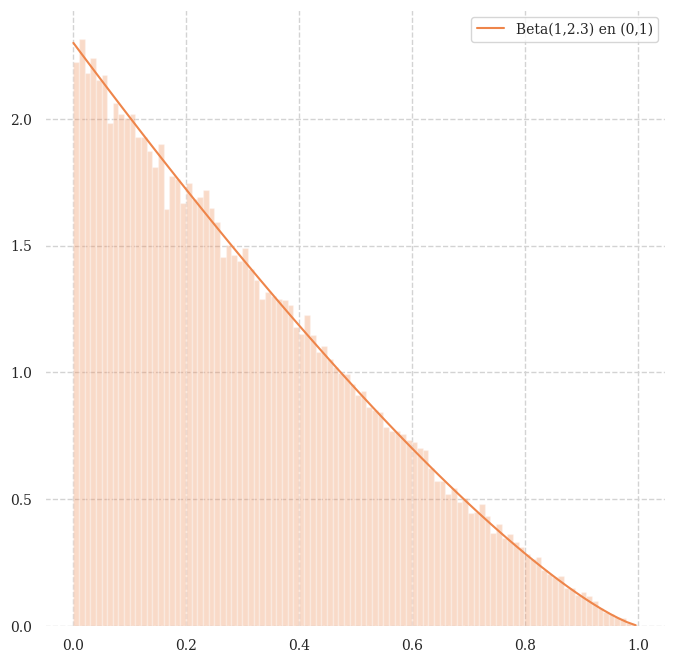

In [ ]:
def rbeta_alpha1_beta(beta=2.0, s=3.0, n=100000):
    X, trials = [], 0
    while len(X) < n:
        y = rng.random() * s           # Unif(0,s)
        u = rng.random()
        if u <= (1 - y/s)**(beta - 1):
            X.append(y)
        trials += 1
    X = np.array(X)
    acc = len(X)/trials
    return X, acc, trials

# Beta(1, 2.3) en (0,1): beta=2.3, s=1
x1, acc1, tr1 = rbeta_alpha1_beta(beta=2.3, s=1.0, n=100000)
print(f"Beta(1,2.3) en (0,1): aceptación empírica ≈ {acc1:.3f}, teórica = {1/2.3:.3f}, intentos/muestra ≈ {tr1/len(x1):.2f}")

x = np.linspace(0, 3, 200)
plt.plot(x[x<=1], 2.3*(1 - x[x<=1])**1.3, label="Beta(1,2.3) en (0,1)", color='C1')
plt.hist(x1, bins=100, density=True, alpha=0.3, color='C1')
plt.legend()
plt.show()


# Ejercicio 3

Considere la siguiente función de distribución acumulada

$$
F(x) = x^{n},\quad 0 \le x \le 1.
$$

## a) Método de la transformada inversa

Aplique el método de la transformada inversa para dar un algoritmo que simule una variable aleatoria con la función de distribución anterior.


Sea $U\sim\mathrm{Unif}(0,1)$. Definimos

  

$$

X = U^{1/n}.

$$

  

Entonces

  

$$

P(X\le x)=P(U^{1/n}\le x)=P(U\le x^n)=x^n=F(x),

$$

  

luego $X$ tiene CDF $F(x)=x^n$.

**Algoritmo:** genera $U$ y regresa $U^{1/n}$. Aceptación: 100%.

## b) Método de aceptación–rechazo

Aplique el método de aceptación y rechazo para el mismo caso.


La densidad objetivo es $f(x)=F'(x)=n\,x^{n-1}$ en $(0,1)$.

Toma propuesta $g(x)=1$ (uniforme en $(0,1)$). Entonces

  

$$

\frac{f(x)}{g(x)}=n\,x^{n-1}\le \max_{x\in(0,1)} n\,x^{n-1}=n

\quad\Rightarrow\quad \boxed{c=n}.

$$

  

**Criterio:** genera $Y\sim\mathrm{Unif}(0,1)$, $U\sim\mathrm{Unif}(0,1)$ y acepta si

  

$$

U \le \frac{f(Y)}{c\,g(Y)}=\frac{nY^{n-1}}{n}=Y^{\,n-1}.

$$

  

**Eficiencia:** prob. de aceptación $=1/c=1/n$; intentos esperados $=c=n$.


## c) Implementación computacional

Elabore un programa de cómputo para implementar ambos algoritmos.

[Inversa]  tiempo=0.002s,   rechazos=0,            uniformes≈100000
[A-R]      tiempo=0.836s,   aceptación≈0.143 (teórica 0.143), propuestas=697968 (~6.98 por muestra), uniformes≈1395936
Inversa: mean≈0.8746 vs 0.8750, var≈0.0122 vs 0.0122
A-R    : mean≈0.8740 vs 0.8750, var≈0.0123 vs 0.0122


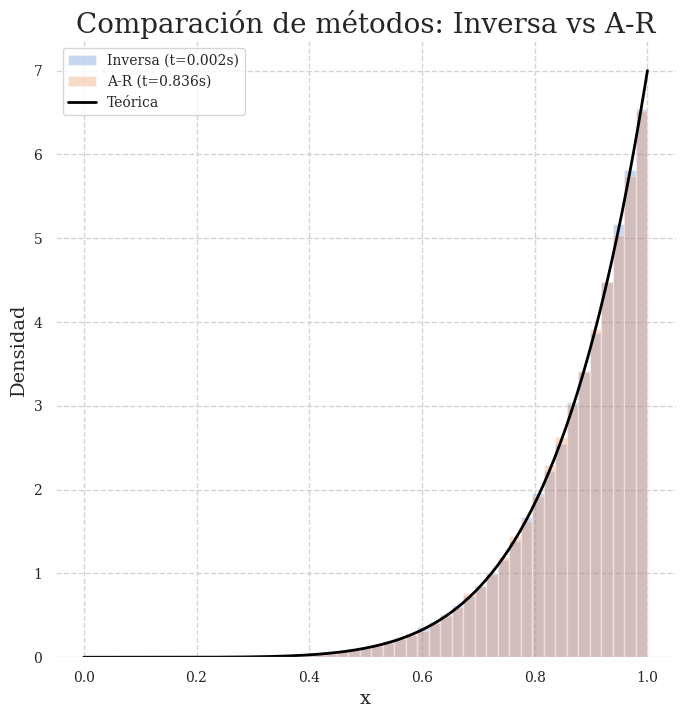

In [21]:
def sample_inverse(n, size):
    u = rng.random(size)
    return u**(1.0/n)

def sample_ar(n, size):
    X, trials = [], 0
    while len(X) < size:
        y = rng.random()
        u = rng.random()
        trials += 1
        if u <= y**(n-1):
            X.append(y)
    return np.array(X), len(X)/trials, trials

# Demo
n, N = 7, 100_000

t0 = time.perf_counter()
x_inv = sample_inverse(n, N)
t_inv = time.perf_counter() - t0

t0 = time.perf_counter()
x_ar, acc_ar, props = sample_ar(n, N)
t_ar = time.perf_counter() - t0

print(f"[Inversa]  tiempo={t_inv:.3f}s,   rechazos=0,            uniformes≈{N}")
print(f"[A-R]      tiempo={t_ar:.3f}s,   aceptación≈{acc_ar:.3f} (teórica {1/n:.3f}), "
      f"propuestas={props} (~{props/N:.2f} por muestra), uniformes≈{2*props}")

# Chequeo de momentos (teóricos: E[X]=n/(n+1), Var[X]=n/[(n+2)(n+1)^2])
def stats(name, x):
    mean = x.mean()
    var  = x.var()
    mt   = n/(n+1)
    vt   = n/((n+2)*(n+1)**2)
    print(f"{name}: mean≈{mean:.4f} vs {mt:.4f}, var≈{var:.4f} vs {vt:.4f}")

stats("Inversa", x_inv)
stats("A-R    ", x_ar)

# Plot histograms for both methods
bins = np.linspace(0, 1, 50)
plt.hist(x_inv, bins=bins, density=True, alpha=0.3, label=f"Inversa (t={t_inv:.3f}s)")
plt.hist(x_ar, bins=bins, density=True, alpha=0.3, label=f"A-R (t={t_ar:.3f}s)")

# Overlay the theoretical density
x_vals = np.linspace(0, 1, 200)
theoretical_density = n * x_vals**(n - 1)
plt.plot(x_vals, theoretical_density, label="Teórica", color="black", linewidth=2)

plt.title("Comparación de métodos: Inversa vs A-R")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## d) Eficiencia comparada

Compare la eficiencia de ambos métodos y justifique cuál es más
recomendable.



* **Transformada inversa:** 1 uniforme por muestra, 0 rechazos → **siempre más eficiente** aquí.

* **A–R:** aceptación $1/n$ (requiere $\approx n$ propuestas y $\approx 2n$ uniformes por muestra aceptada).

# Ejercicio 4

En el contexto del método de aceptación y rechazo para generar valores de la distribución $\mathcal{N}(\mu, \sigma^{2})$, demuestre directamente los siguientes resultados:

## a) Densidad de |Z| para Z∼N(0,1)

Si $Z \sim \mathcal{N}(0,1)$, entonces $|Z|$ tiene función de densidad

$$
f_{|Z|}(x) = \sqrt{\tfrac{2}{\pi}}\, e^{-x^{2}/2}, \qquad x > 0.
$$

Sea $Z\sim\mathcal N(0,1)$. Para $x>0$:

$$
P(|Z|\le x)=P(-x\le Z\le x)=\Phi(x)-\Phi(-x)=2\Phi(x)-1.
$$

Derivando:

$$
f_{|Z|}(x)=\frac{d}{dx}\,[2\Phi(x)-1]=2\phi(x)
=\boxed{\sqrt{\frac{2}{\pi}}\,e^{-x^{2}/2}},\quad x>0.
$$

## b) Simetrización con S·|Z|

Si $S \sim \text{Unif}\{+1,-1\}$ es independiente de $|Z|$ (con $Z$ como en (a)),
entonces $S\,|Z| \sim \mathcal{N}(0,1)$.

Sea $S\sim\text{Unif}\{+1,-1\}$ independiente de $|Z|$. Para $z\in\mathbb R$:

$$
f_{S|Z|}(z)=\tfrac12 f_{|Z|}(|z|)+\tfrac12 f_{|Z|}(|z|)=f_{|Z|}(|z|)=\phi(z),
$$

luego $\boxed{S\,|Z|\sim \mathcal N(0,1)}$.

## c) Evento de aceptación con X∼Exp(1) y U∼Unif(0,1)

Sea $X \sim \text{Exp}(\lambda)$ con $\lambda = 1$ y $U \sim \text{Unif}(0,1)$ independientes.
Considere el evento

$$
\big\{ U \le \exp\big(-\tfrac{(X-1)^{2}}{2}\big) \big\}.
$$


Entonces, la distribución de $X$ condicionada a este evento tiene
densidad

$$
f(x) = \sqrt{\tfrac{2}{\pi}}\, e^{-x^{2}/2}, \qquad x > 0,
$$

la cual corresponde a la densidad del valor absoluto de una normal
estándar $Z \sim \mathcal{N}(0,1)$.

Propuesta $g(x)=e^{-x}$ en $x>0$ y objetivo $f(x)=f_{|Z|}(x)$.

$$
\frac{f(x)}{g(x)}=\sqrt{\frac{2}{\pi}}\,\frac{e^{-x^2/2}}{e^{-x}}
=\sqrt{\frac{2}{\pi}}\,e^{-\frac{(x-1)^2}{2}}\,e^{1/2}.
$$

El máximo es en $x=1$, así

$$
\boxed{c=\sqrt{\frac{2e}{\pi}}},\qquad
\frac{f(x)}{c\,g(x)}=e^{-\frac{(x-1)^2}{2}}.
$$

**Regla:** genera $Y\sim\mathrm{Exp}(1)$, $U\sim U(0,1)$; acepta $|Z|=Y$ si

$$
\boxed{U\le \exp\!\Big(-\tfrac{(Y-1)^2}{2}\Big)}.
$$

Luego toma $Z=S|Z|$ con $S\sim\text{Unif}\{\pm1\}$.
Prob. de aceptación $=1/c=\boxed{\sqrt{\pi/(2e)}}$.


## d) Probabilidad con V1,V2∼Exp(1)

Sean $V_1$ y $V_2$ variables aleatorias independientes e idénticamente
distribuidas como $\text{Exp}(\lambda)$ con $\lambda = 1$. Entonces se cumple que

$$
\mathbb{P}\!\left( V_{1} \ge \tfrac{(V_{2}-1)^{2}}{2} \right)
= \sqrt{\tfrac{\pi}{2e}}\,.
$$

Si $V_1,V_2\overset{iid}{\sim}\mathrm{Exp}(1)$,

$$
\begin{aligned}
P\!\left[V_1\ge \frac{(V_2-1)^2}{2}\right]
&=\int_0^\infty P\!\left[V_1\ge \tfrac{(y-1)^2}{2}\right] e^{-y}\,dy
=\int_0^\infty e^{-\frac{(y-1)^2}{2}}\,e^{-y}\,dy\\
&=\int_0^\infty \exp\!\Big(-\tfrac{y^2+1}{2}\Big)\,dy
=e^{-1/2}\!\int_0^\infty e^{-y^2/2}\,dy
=\boxed{\sqrt{\frac{\pi}{2e}}}.
\end{aligned}
$$

Coincide con la prob. de aceptación de (c).


# Ejercicio 5

Implemente un algoritmo de simulación para la distribución $\text{Gamma}$
con los siguientes parámetros:

Elabore un programa de cómputo que genere simulaciones de ambas
distribuciones y compare los resultados empíricos con las densidades
teóricas correspondientes.

## a) $\text{Gamma}(1.5, 3)$

$$
\text{Gamma}(1.5, 3)
$$

Gamma(1.5,3): aceptación≈0.798, 1/c≈0.795


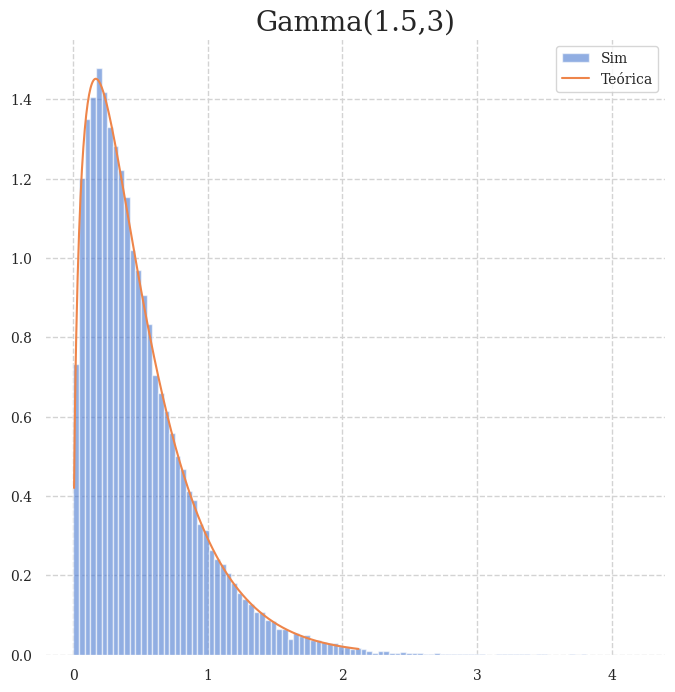

In [30]:

# (i) A-R para alpha>1 con mu = lambda/alpha (óptimo)
def rgamma_alpha_gt1(alpha, lam, n=60000):
    mu = lam / alpha
    K = lam**alpha / math.gamma(alpha)  # constante de f
    # c(mu) evaluada en el máximo:
    c = (K/mu) * ((alpha-1)/(lam-mu))**(alpha-1) * math.e**(1-alpha)
    X, trials = [], 0
    while len(X) < n:
        y = rng.exponential(1/mu)                   # Exp(mu): media 1/mu
        u = rng.random()
        if u <= (K * y**(alpha-1) * math.exp(-lam*y)) / (c * (mu * math.exp(-mu*y))):
            X.append(y)
        trials += 1
    return np.array(X), len(X)/trials, c

# (ii) Reducción de orden para alpha in (0,1)
def rgamma_alpha_lt1(alpha, lam, n=60000):
    Y, accY, cY = rgamma_alpha_gt1(alpha+1, lam, n)  # primero Gamma(alpha+1, lam)
    U = rng.random(n)
    X = Y * (U ** (1.0/alpha))
    return X

# (a) Gamma(1.5, 3)
x_a, acc_a, c_a = rgamma_alpha_gt1(1.5, 3.0, 60000)
print(f"Gamma(1.5,3): aceptación≈{acc_a:.3f}, 1/c≈{1/c_a:.3f}")

# Comparación con densidad teórica
xs = np.linspace(0, np.quantile(x_a, 0.995), 400)[1:]
f = (3.0**1.5 / math.gamma(1.5)) * xs**(1.5-1) * np.exp(-3.0*xs)
plt.figure(); plt.hist(x_a, bins=100, density=True, alpha=0.6, label="Sim")
plt.plot(xs, f, label="Teórica"); plt.legend(); plt.title("Gamma(1.5,3)")
plt.show()

## b) $\text{Gamma}(0.5, 6)$

$$
\text{Gamma}(0.5, 6)
$$

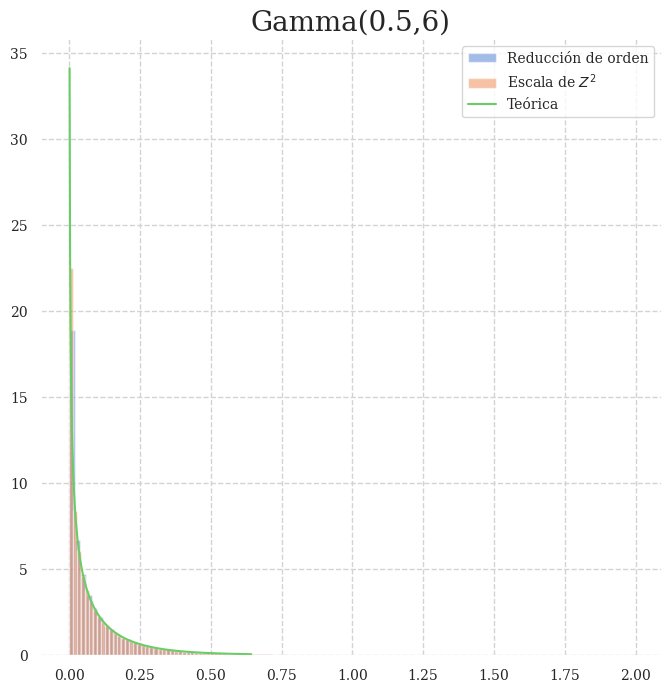

Medias: b1≈0.0835, b2≈0.0836, teórica=0.0833
Varianzas: b1≈0.0139, b2≈0.0138, teórica=0.0139


In [29]:

# (b) Gamma(0.5, 6) por dos vías
x_b1 = rgamma_alpha_lt1(0.5, 6.0, 60000)   # reducción de orden

# vía chi-cuadrado: Z^2 ~ Gamma(0.5, 0.5)  =>  (Z^2)/12 ~ Gamma(0.5, 6)
Z = rng.standard_normal(60000)
x_b2 = (Z**2) / 12.0

# Densidad teórica
xs = np.linspace(0, np.quantile(x_b1, 0.995), 400)[1:]
f = (6.0**0.5 / math.gamma(0.5)) * xs**(0.5-1) * np.exp(-6.0*xs)

plt.figure()
plt.hist(x_b1, bins=100, density=True, alpha=0.5, label="Reducción de orden")
plt.hist(x_b2, bins=100, density=True, alpha=0.5, label=r"Escala de $Z^2$")
plt.plot(xs, f, label="Teórica"); plt.legend(); plt.title("Gamma(0.5,6)")
plt.show()

print(f"Medias: b1≈{x_b1.mean():.4f}, b2≈{x_b2.mean():.4f}, teórica={0.5/6:.4f}")
print(f"Varianzas: b1≈{x_b1.var():.4f}, b2≈{x_b2.var():.4f}, teórica={0.5/6**2:.4f}")
